**1.1 Extract Information From My Transaction**

In [3]:
import json
import requests
import datetime
import pandas as pd

transaction = requests.get("https://api.whatsonchain.com/v1/bsv/main/block/height/774921")
transaction_data = json.loads(transaction.text)
transaction_data

{'hash': '000000000000000005569f5f0f6aa6c8d17e903a2e0c788984e6eaccdb0142de',
 'confirmations': 421,
 'size': 8579485,
 'height': 774921,
 'version': 939515904,
 'versionHex': '37ffe000',
 'merkleroot': 'bbfe75cea1da51f20339cb4ef9917325b2524d5262ba9150583ce5a1c9454fa2',
 'txcount': 19649,
 'nTx': 0,
 'num_tx': 19649,
 'tx': ['04a387fec0a693dfc223a667f0039ccd5e57f03fb223b146d2afdcd1d836510e',
  'e5b2dca937733d9247d2abb1afd0c99216176bdca929146eadcfea9d036f921f',
  '725aa71b3f93912824f5a4b127cffa127e820a3d01cbd88e6ab6da135b5928b3',
  'b66b49eab7de9f1096eee111f1232d33da39ef43a5dd75a687e49811aa459368',
  '29a440a05018a73b7be63cb688f78f9ec970680f26d2b67b85f762ad51ea47dc',
  '384c223ec10b768e572c025ee0a82f84eb5bc62759b2f31fab73b82bae1aef49',
  '0ed46696afb6de63ce88b2a765b256c5484037a7c54e53811ba9b9fd993c3eab',
  'a484809cb18f2248d035342db635544827aac3f572c61ab4b5196dfd279af1ea',
  '783929eac619a5b9f5b78ce915b2d90d08c51183f00a60a3fe2c4d4791c6f3bb',
  'cfad73a9839e41d6eadd5160eaded95fc151c8f8aa8

In [5]:
timestamp = datetime.datetime.fromtimestamp(transaction_data['time'])
print(timestamp.strftime('%Y-%m-%d %H:%M:%S'))

2023-01-16 08:08:29


**2.1 Obtain Time Series Data**

<AxesSubplot: >

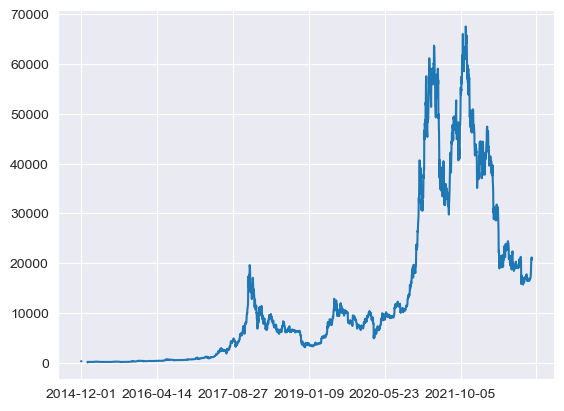

In [6]:
from fredapi import Fred
text_file = open("fred_api_key.txt", "r")
fred = Fred(api_key=text_file.read())

import yfinance as yf
ticker = yf.Ticker("MSFT")

btc = fred.get_series('CBBTCUSD')
btc.index = btc.index.strftime('%Y-%m-%d')
msft = ticker.history(period="5000d")['Close']
msft.index = msft.index.strftime('%Y-%m-%d')
sp500 = fred.get_series('SP500')
sp500.index = sp500.index.strftime('%Y-%m-%d')
btc.plot()

<AxesSubplot: xlabel='Date'>

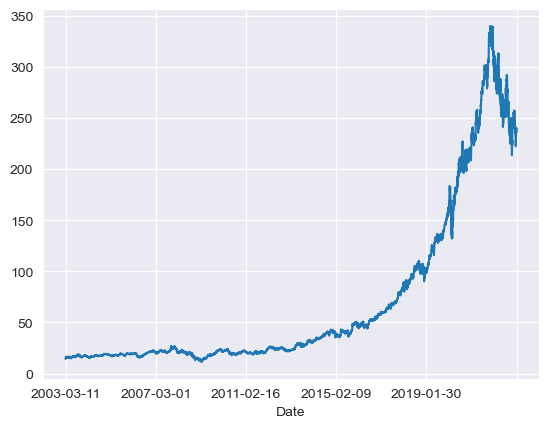

In [7]:
msft.plot()

<AxesSubplot: >

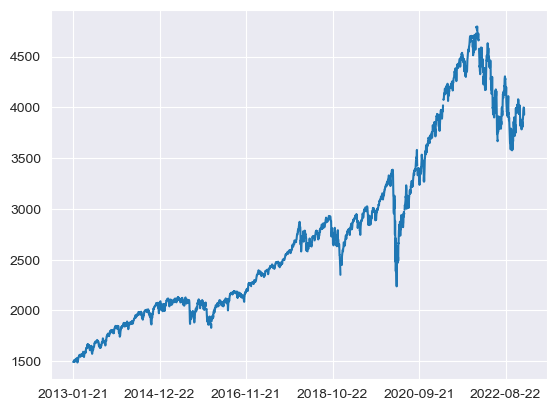

In [8]:
sp500.plot()

**2.2 Data Transformations**

In [9]:
df = pd.concat([btc,msft,sp500], axis=1)
df.columns = ('btc','msft','sp500')
df = df.fillna(method='ffill')
df= df.loc[:'2023-01-17']
df

,btc,msft,sp500
2014-12-01,370.00,42.434814,2053.44
2014-12-02,378.00,42.295174,2066.55
2014-12-03,378.00,41.963505,2074.33
2014-12-04,377.10,42.626823,2071.92
2014-12-05,377.10,42.260258,2075.37
...,...,...,...
2023-01-13,19909.21,239.229996,3999.09
2023-01-14,20970.85,239.229996,3999.09
2023-01-15,20871.25,239.229996,3999.09
2023-01-16,21186.93,239.229996,3999.09


In [10]:
import numpy as np
df['log_(btc/btct-1)'] = np.log(df['btc']/df['btc'].shift(1))
df['log_(msft/msft-1)'] = np.log(df['msft']/df['msft'].shift(1))
df['log_(sp500/sp500-1)'] = np.log(df['sp500']/df['sp500'].shift(1))
df = df.drop(df.index[0])
df

,btc,msft,sp500,log_(btc/btct-1),log_(msft/msft-1),log_(sp500/sp500-1)
2014-12-02,378.00,42.295174,2066.55,0.021391,-0.003296,0.006364
2014-12-03,378.00,41.963505,2074.33,0.000000,-0.007873,0.003758
2014-12-04,377.10,42.626823,2071.92,-0.002384,0.015683,-0.001162
2014-12-05,377.10,42.260258,2075.37,0.000000,-0.008637,0.001664
2014-12-06,378.00,42.260258,2075.37,0.002384,0.000000,0.000000
...,...,...,...,...,...,...
2023-01-13,19909.21,239.229996,3999.09,0.053941,0.003014,0.003989
2023-01-14,20970.85,239.229996,3999.09,0.051951,0.000000,0.000000
2023-01-15,20871.25,239.229996,3999.09,-0.004761,0.000000,0.000000
2023-01-16,21186.93,239.229996,3999.09,0.015012,0.000000,0.000000


**2.3 Data Analysis**

In [11]:
btc_returns = df['log_(btc/btct-1)']
msft_returns = df['log_(msft/msft-1)']
sp500_returns = df['log_(sp500/sp500-1)']

In [12]:
y = btc_returns
x = msft_returns
z = sp500_returns
x_y_correl = y.corr(x)
z_y_correl = y.corr(z)
print("x_y_correl:",x_y_correl)
print("z_y_correl:",z_y_correl)

x_y_correl: 0.1638733100187065
z_y_correl: 0.18123676481792286


#### In the context of the Capital Asset Pricing Model (CAPM), correlation could measure the relationship between the returns of an individual asset and the returns of the overall market. The correlation between bitcoin and Microsoft, and S&P500 returns are quite low in this case, indicating weak relationship between these assets.

In [13]:
from sklearn.linear_model import LinearRegression
y = btc_returns.values.reshape(-1, 1)
X = sp500_returns.values.reshape(-1, 1)
lr = LinearRegression()
lr.fit(X, y)
print(lr.intercept_, lr.coef_)

[0.00118887] [[0.7769518]]


#### The result indicating that bitcoin is less volatile than the market (which in this case S&P500), and therefore carries a lower risk premium，which is rather different from our perception of Bitcoin.

**3.1 Description of FinTech Firm**

Sarunas’ FinTech firm processes the information filled out by users based on a machine learning model as a way to determine whether to give a loan or not. The app architecture was divided into four main blocks:

1. The user fills in information via streamlit UI, including loan amount, annual income, etc.
2. A json file containing the data will be sent to Fastapi. And then Jupyter notebook processes the data through an algorithmic model serving in Fastapi, and fastapi send the results back to streamlit UI in json format
3. The data will be stored in the Postgres database
4. Jupyter notebook retrieves historical data from the database for machine learning modelling to calculate the likelihood of the user repaying the loan under various conditions and set a threshold value to decide whether to grant the user a loan
